In [0]:
from keras.datasets import reuters
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

In [11]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

hitory = model.fit(x_train,y_train, batch_size=100, epochs=20, validation_data=(x_test,y_test))

print('\n Test loss: %.4f'%(model.evaluate(x_test, y_test)[0]))
print('\n Test Accuracy: %.4f'%(model.evaluate(x_test, y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 26s 3ms/step - loss: 2.5767 - acc: 0.3667 - val_loss: 2.1070 - val_acc: 0.4720
Epoch 2/20
8982/8982 [==============================] - 26s 3ms/step - loss: 2.0509 - acc: 0.4837 - val_loss: 1.9236 - val_acc: 0.5062
Epoch 3/20
8982/8982 [==============================] - 25s 3ms/step - loss: 1.8170 - acc: 0.5341 - val_loss: 1.7748 - val_acc: 0.5436
Epoch 4/20
8982/8982 [==============================] - 26s 3ms/step - loss: 1.7268 - acc: 0.5469 - val_loss: 1.7585 - val_acc: 0.5606
Epoch 5/20
8982/8982 [==============================] - 26s 3ms/step - loss: 1.6544 - acc: 0.5753 - val_loss: 1.6821 - val_acc: 0.5752
Epoch 6/20
8982/8982 [==============================] - 26s 3ms/step - loss: 1.5882 - acc: 0.5943 - val_loss: 1.6049 - val_acc: 0.6082
Epoch 7/20
8982/8982 [==============================] - 26s 3ms/step - loss: 1.4608 - acc: 0.6294 - val_loss: 1.5163 - val_acc: 0.6238
Epoch 8

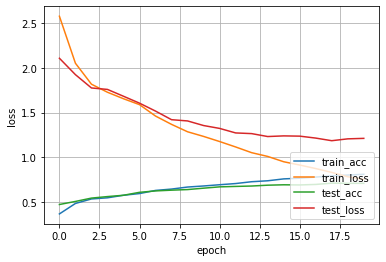

In [22]:
import matplotlib.pyplot as plt

y_acc = hitory.history['acc']
y_loss = hitory.history['loss']
y_vacc = hitory.history['val_acc']
y_vloss = hitory.history['val_loss']

plt.plot(y_acc, label='train_acc')
plt.plot(y_loss, label='train_loss')
plt.plot(y_vacc, label='test_acc')
plt.plot(y_vloss, label='test_loss')

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()